## in this Script we create the potentially fourth figure of the paper 

##### what we do is as follows: We run two Sweepers and trade-offs between time-horizon and income goal with the carbon budget transgression as outcome. The defining distinction between both sweepers is whether high income groups (defined as higher than the scenario specific income goal) remain at their current income or degrow their income.

this is the coords_2_degree67 [array([[ 2040.        , 27164.48389838],
       [ 2041.61956293, 25000.        ],
       [ 2045.92006516, 20000.        ],
       [ 2048.89899781, 17212.54119917],
       [ 2054.33371882, 12909.49532082],
       [ 2058.60671855, 10000.        ],
       [ 2060.        ,  9371.10534292],
       [ 2078.21800249,  5000.        ]])]
this is the coords_2_degree67 [array([[ 2040.        , 26373.56130131],
       [ 2040.97689803, 25000.        ],
       [ 2044.92738335, 20000.        ],
       [ 2047.47495683, 17250.63960215],
       [ 2052.05366252, 12806.89358399],
       [ 2055.24470098, 10000.        ],
       [ 2060.        ,  6698.87145499],
       [ 2064.68984152,  5000.        ]])]
this is the coords_2_degree67 [array([[ 2040.        , 25896.59875949],
       [ 2040.60495657, 25000.        ],
       [ 2044.2973881 , 20000.        ],
       [ 2045.34249264, 17354.24497018],
       [ 2048.07383855, 12716.02098562],
       [ 2050.21598455, 10000.        ],
 

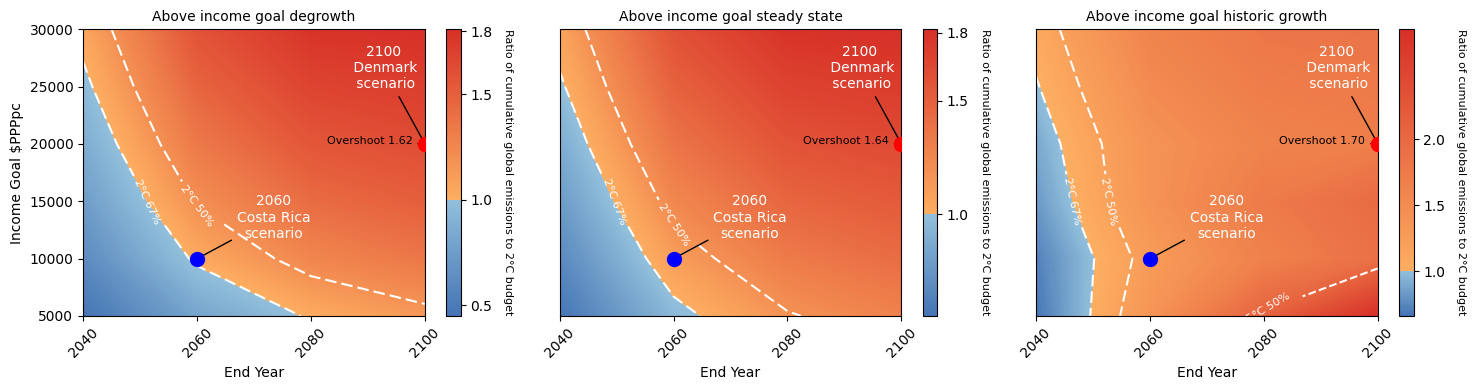

In [1]:
# Import all things necessary
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.cm as cm
from scenariosweeper_class import ScenarioSweeper
import matplotlib.gridspec as gridspec


# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
ax3 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# calculate how much emissions are emitted in a given scenario run and how far above this is the carbon budget by summing the yearly emissions of all countries
# Sweeper 1 
end_year_values = [2040, 2060, 2080, 2100]
income_goal_values = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values = ["constant_ratio"]
pop_growth_assumption_values = ["semi_log_model"]
tech_evolution_assumption_values = ["plausible"]
tech_hysteresis_assumption_values = ["off"]
steady_state_high_income_assumption_values = ["off"]
population_hysteresis_assumption_values = ["on"]
sigmoid_parameters = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate = -0.05 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper1 = ScenarioSweeper(end_year_values,
                           income_goal_values,
                           carbon_budget_values,
                           gdp_assumption_values,
                           pop_growth_assumption_values,
                           tech_evolution_assumption_values,
                           tech_hysteresis_assumption_values,
                           steady_state_high_income_assumption_values,
                           sigmoid_parameters,
                           final_improvement_rate,
                           population_hysteresis_assumption_values)


# Sweeper 2
end_year_values2 = [2040, 2060, 2080, 2100]
income_goal_values2 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values2 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values2 = ["constant_ratio"]
pop_growth_assumption_values2 = ["semi_log_model"]
tech_evolution_assumption_values2 = ["plausible"]
tech_hysteresis_assumption_values2 = ["off"]
steady_state_high_income_assumption_values2 = ["on"]
population_hysteresis_assumption_values2 = ["on"]
sweeper2 = ScenarioSweeper(end_year_values2,
                            income_goal_values2,
                            carbon_budget_values2,
                            gdp_assumption_values2,
                            pop_growth_assumption_values2,
                            tech_evolution_assumption_values2,
                            tech_hysteresis_assumption_values2,
                            steady_state_high_income_assumption_values2,
                            sigmoid_parameters,
                            final_improvement_rate,
                            population_hysteresis_assumption_values2)

# Sweeper 3
end_year_values3 = [2040, 2060, 2080, 2100]
income_goal_values3 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values3 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values3 = ["constant_ratio"]
pop_growth_assumption_values3 = ["semi_log_model"]
tech_evolution_assumption_values3 = ["plausible"]
tech_hysteresis_assumption_values3 = ["off"]
steady_state_high_income_assumption_values3 = ["on_with_growth"]
population_hysteresis_assumption_values3 = ["on"]
sweeper3 = ScenarioSweeper(end_year_values3,
                            income_goal_values3,
                            carbon_budget_values3,
                            gdp_assumption_values3,
                            pop_growth_assumption_values3,
                            tech_evolution_assumption_values3,
                            tech_hysteresis_assumption_values3,
                            steady_state_high_income_assumption_values3,
                            sigmoid_parameters,
                            final_improvement_rate,
                            population_hysteresis_assumption_values3)

output_sweeper1 = sweeper1.run_scenarios() 
output_sweeper2 = sweeper2.run_scenarios()
output_sweeper3 = sweeper3.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input1 = output_sweeper1[0] # output now will be transformed to an input for the plots function
input2 = output_sweeper2[0] # output now will be transformed to an input for the plots function
input3 = output_sweeper3[0] # output now will be transformed to an input for the plots function

# Create a new figure with four axes
sweeper1.plot_total_emissions_trade_off(input1, ["end_year", "income_goal"], ax = ax1, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)
sweeper2.plot_total_emissions_trade_off(input2, ["end_year", "income_goal"], ax = ax2, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)   
sweeper3.plot_total_emissions_trade_off(input3, ["end_year", "income_goal"], ax = ax3, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)

# After plotting:
# For ax2 and ax3, remove y-axis labels, tick labels, and tick markers
ax2.set_ylabel('')
ax2.set_yticks([])
ax3.set_ylabel('')
ax3.set_yticks([])

# delete y axis ticklabels
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Setting titles for each subplot
ax3.set_title("Above income goal historic growth", fontsize=10)
ax2.set_title("Above income goal steady state", fontsize=10)
ax1.set_title("Above income goal degrowth", fontsize=10)  # 'pad' adjusts the distance between the title and the plot


# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax1.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax2.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax3.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')


# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax1.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5, 1.8])
cbar = ax2.collections[0].colorbar
cbar.set_ticks([1, 1.5, 1.8])
cbar = ax3.collections[0].colorbar
cbar.set_ticks([1, 1.5, 2])


plt.tight_layout()
# save high resolution as fig4
plt.savefig('fig4.png', dpi=300, bbox_inches='tight')
plt.show()

this is the coords_2_degree67 [array([[ 2040.        , 24706.65039534],
       [ 2043.13364521, 20000.        ],
       [ 2047.41561743, 15000.        ],
       [ 2050.93045905, 12162.83242175],
       [ 2057.74314887,  8177.45196527],
       [ 2060.        ,  7182.29866993],
       [ 2067.53088008,  5000.        ]])]
this is the coords_2_degree67 [array([[ 2040.        , 27353.42971094],
       [ 2041.78459948, 25000.        ],
       [ 2046.30992961, 20000.        ],
       [ 2051.98709651, 15000.        ],
       [ 2056.50232205, 12067.30513501],
       [ 2065.66497717,  9146.28260813],
       [ 2080.        ,  7223.07886166],
       [ 2100.        ,  6196.54468656]])]
this is the coords_2_degree67 [array([[ 2042.42287797, 30000.        ],
       [ 2048.39385044, 25000.        ],
       [ 2055.76312615, 20000.        ],
       [ 2056.61220458, 19493.17407163],
       [ 2066.33139723, 17056.21354214],
       [ 2080.        , 16160.84451361],
       [ 2100.        , 18909.40795533]])]

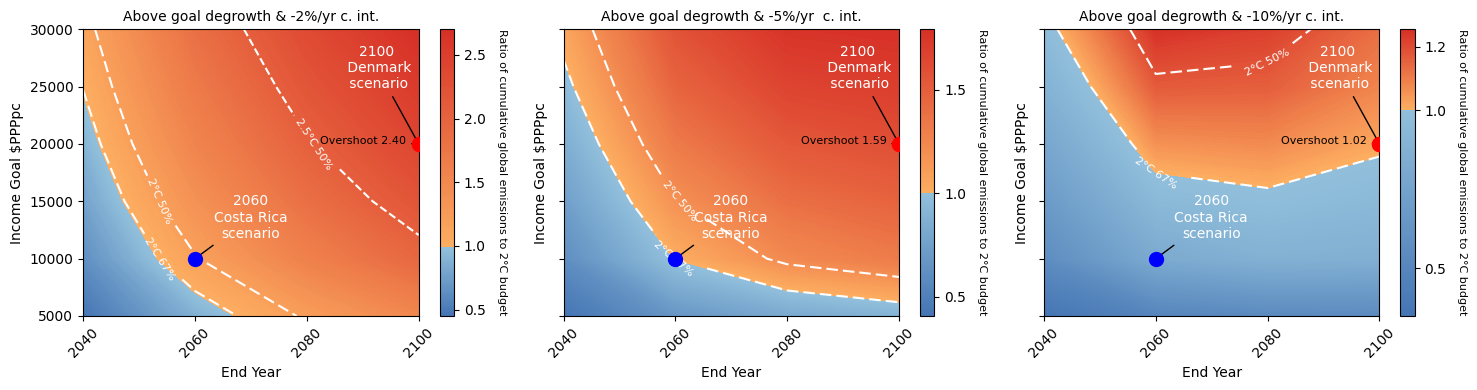

In [2]:

# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
ax4 = fig.add_subplot(gs[0, 0])  # First row, first column
ax5 = fig.add_subplot(gs[0, 1])  # First row, second column
ax6 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# Sweeper 4
end_year_values4 = [2040, 2060, 2080, 2100]
income_goal_values4 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values4 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values4 = ["constant_ratio"]
pop_growth_assumption_values4 = ["semi_log_model"]
tech_evolution_assumption_values4 = ["plausible"]
tech_hysteresis_assumption_values4 = ["on"]
steady_state_high_income_assumption_values4 = ["off"]
population_hysteresis_assumption_values4 = ["on"]
sigmoid_parameters4 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate4 = -0.02 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper4 = ScenarioSweeper(end_year_values4,
                            income_goal_values4,
                            carbon_budget_values4,
                            gdp_assumption_values4,
                            pop_growth_assumption_values4,
                            tech_evolution_assumption_values4,
                            tech_hysteresis_assumption_values4,
                            steady_state_high_income_assumption_values4,
                            sigmoid_parameters4, # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
                            final_improvement_rate4,
                            population_hysteresis_assumption_values4)

# Sweeper 5
end_year_values5 = [2040, 2060, 2080, 2100]
income_goal_values5 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values5 = [1150*0.95 - 2*35]
hysteresis_tech_progress_values5 = [0.05]
gdp_assumption_values5 = ["constant_ratio"]
pop_growth_assumption_values5 = ["semi_log_model"]
tech_evolution_assumption_values5 = ["plausible"]
tech_hysteresis_assumption_values5 = ["on"]
steady_state_high_income_assumption_values5 = ["off"]
population_hysteresis_assumption_values5 = ["on"]
sigmoid_parameters5 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate5 = -0.05 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper5 = ScenarioSweeper(end_year_values5,
                           income_goal_values5,
                           carbon_budget_values5,
                           gdp_assumption_values5,
                           pop_growth_assumption_values5,
                           tech_evolution_assumption_values5,
                           tech_hysteresis_assumption_values5,
                           steady_state_high_income_assumption_values5,
                           sigmoid_parameters5,
                           final_improvement_rate5,
                           population_hysteresis_assumption_values5)


# Sweeper 6
end_year_values6 = [2040, 2060, 2080, 2100]
income_goal_values6 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values6 = [1150*0.95 - 2*35]
gdp_assumption_values6 = ["constant_ratio"]
pop_growth_assumption_values6 = ["semi_log_model"]
tech_evolution_assumption_values6 = ["plausible"]
tech_hysteresis_assumption_values6 = ["on"]
steady_state_high_income_assumption_values6 = ["off"]
population_hysteresis_assumption_values6 = ["on"]
sigmoid_parameters6 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate6 = -0.1 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper6 = ScenarioSweeper(end_year_values6,
                           income_goal_values6,
                           carbon_budget_values6,
                           gdp_assumption_values6,
                           pop_growth_assumption_values6,
                           tech_evolution_assumption_values6,
                           tech_hysteresis_assumption_values6,
                           steady_state_high_income_assumption_values6,
                           sigmoid_parameters6,
                           final_improvement_rate6,
                           population_hysteresis_assumption_values6)

output_sweeper4 = sweeper4.run_scenarios()
output_sweeper5 = sweeper5.run_scenarios()
output_sweeper6 = sweeper6.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input4 = output_sweeper4[0] # output now will be transformed to an input for the plots function
input5 = output_sweeper5[0] # output now will be transformed to an input for the plots function
input6 = output_sweeper6[0] # output now will be transformed to an input for the plots function
# Create a new figure with four axes
sweeper4.plot_total_emissions_trade_off(input4, ["end_year", "income_goal"], ax = ax4, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)
sweeper5.plot_total_emissions_trade_off(input5, ["end_year", "income_goal"], ax = ax5, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)   
sweeper6.plot_total_emissions_trade_off(input6, ["end_year", "income_goal"], ax = ax6, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)

ax4.set_title("Above goal degrowth & -2%/yr c. int.", fontsize = 10)
ax5.set_title("Above goal degrowth & -5%/yr  c. int.", fontsize = 10)
ax6.set_title("Above goal degrowth & -10%/yr c. int.", fontsize = 10)

ax5.set_yticklabels([])
ax6.set_yticklabels([])


# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax5.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax6.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax4.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5, 2, 2.5])
cbar = ax5.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5])
cbar = ax6.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.2])

plt.tight_layout()
# save high resolution as supp_figx
plt.savefig('supp_figx.png', dpi=300, bbox_inches='tight')
plt.show()


## new code to join the above two figures

this is the coords_2_degree67 [array([[ 2040.        , 27164.48389838],
       [ 2041.61956293, 25000.        ],
       [ 2045.92006516, 20000.        ],
       [ 2048.69870983, 17399.95546846],
       [ 2054.56268056, 12753.59474568],
       [ 2058.60671855, 10000.        ],
       [ 2060.        ,  9371.10534292],
       [ 2078.21800249,  5000.        ]])]
this is the coords_2_degree67 [array([[ 2040.        , 26373.56130131],
       [ 2040.97689803, 25000.        ],
       [ 2044.92738335, 20000.        ],
       [ 2047.29133773, 17448.8027098 ],
       [ 2052.26068751, 12624.79076302],
       [ 2055.24470098, 10000.        ],
       [ 2060.        ,  6698.87145499],
       [ 2064.68984152,  5000.        ]])]
this is the coords_2_degree67 [array([[ 2040.        , 25896.59875949],
       [ 2040.60495657, 25000.        ],
       [ 2044.2973881 , 20000.        ],
       [ 2045.25173662, 17584.00017247],
       [ 2048.23784608, 12508.07628786],
       [ 2050.21598455, 10000.        ],
 

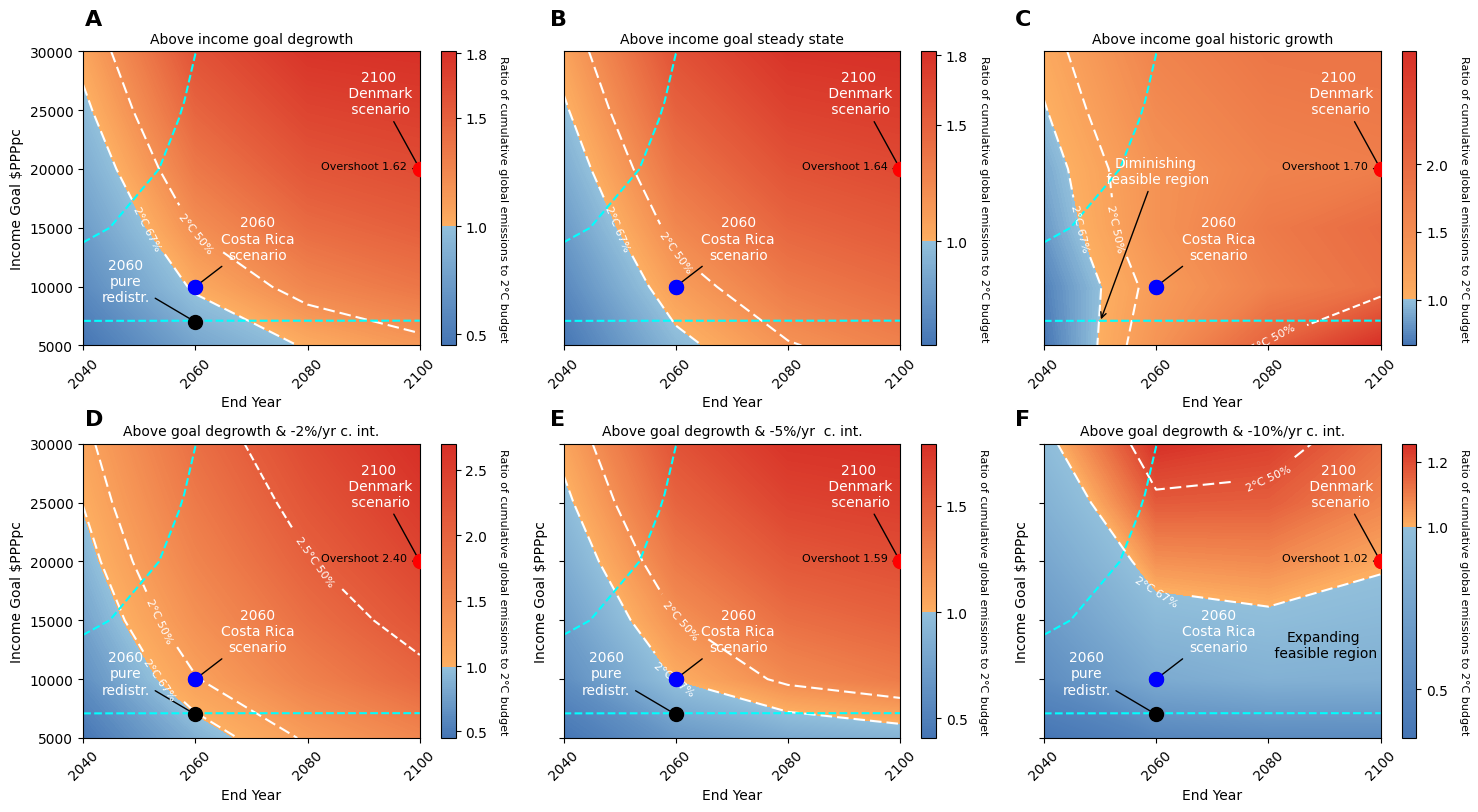

In [3]:
# make new figure with 6 axes and panels which brings together the two figures above for the main figure and use grid spec
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a new figure
fig = plt.figure(figsize=(15, 8))

# Define a GridSpec for a 2x3 grid
gs = gridspec.GridSpec(2, 3, figure=fig)

# Add the subplots from the previous figures to the new figure
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

sweeper1.plot_total_emissions_trade_off(input1, ["end_year", "income_goal"], ax=ax1, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)
sweeper2.plot_total_emissions_trade_off(input2, ["end_year", "income_goal"], ax=ax2, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)
sweeper3.plot_total_emissions_trade_off(input3, ["end_year", "income_goal"], ax=ax3, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)
sweeper4.plot_total_emissions_trade_off(input4, ["end_year", "income_goal"], ax = ax4, fixed_color_scale = False, annotations_plot = True, colorscaleon = True)
sweeper5.plot_total_emissions_trade_off(input5, ["end_year", "income_goal"], ax = ax5, fixed_color_scale = False, annotations_plot = True, colorscaleon = True)   
sweeper6.plot_total_emissions_trade_off(input6, ["end_year", "income_goal"], ax = ax6, fixed_color_scale = False, annotations_plot = True, colorscaleon = True)

########################################
############ AX ANNOTATIONS ############
########################################

# After plotting:
# For ax2 and ax3, remove y-axis labels, tick labels, and tick markers
ax2.set_ylabel('')
ax2.set_yticks([])
ax3.set_ylabel('')
ax3.set_yticks([])
# delete y axis ticklabels
ax2.set_yticklabels([])
ax3.set_yticklabels([])
# Setting titles for each subplot
ax3.set_title("Above income goal historic growth", fontsize=10)
ax2.set_title("Above income goal steady state", fontsize=10)
ax1.set_title("Above income goal degrowth", fontsize=10)  # 'pad' adjusts the distance between the title and the plot
# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax1.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax2.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax3.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
#ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax1.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5, 1.8])
cbar = ax2.collections[0].colorbar
cbar.set_ticks([1, 1.5, 1.8])
cbar = ax3.collections[0].colorbar
cbar.set_ticks([1, 1.5, 2])

# annotate ax1 with the pure redistribution scenario
ax1.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax1.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')


# annotate arrow to blue region in ax3 with text "Diminishing feasible region" and to ax6 with increasing feasile region
ax3.annotate("Diminishing\n feasible region", (2050, 7000), textcoords="offset points", xytext=(40,100), ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"), color='white')


# annotate arrow to blue region in ax3 with text "Diminishing feasible region" and to ax6 with increasing feasile region
ax6.annotate("Expanding\n feasible region", (2080, 6000), textcoords="offset points", xytext=(40,50), ha='center')


ax4.set_title("Above goal degrowth & -2%/yr c. int.", fontsize = 10)
ax5.set_title("Above goal degrowth & -5%/yr  c. int.", fontsize = 10)
ax6.set_title("Above goal degrowth & -10%/yr c. int.", fontsize = 10)
ax5.set_yticklabels([])
ax6.set_yticklabels([])
# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax5.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax6.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
#ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax4.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5, 2, 2.5])
cbar = ax5.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5])
cbar = ax6.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.2])

# annotate the pure redistribution (so no aggregate growth) as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax5.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax6.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
# annotate the costa rica scenario dots
ax4.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax5.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax6.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# Panel labels
labels = ["A", "B", "C", "D", "E", "F"]
# Coordinates for the labels to be placed, relative to the figure size
# These values might need adjustment depending on the exact figure layout
label_coords = [(0.06, 1.01), (0.37, 1.01), (0.68, 1.01), 
                (0.06, 0.51), (0.37, 0.51), (0.68, 0.51)]

for label, (x, y) in zip(labels, label_coords):
    fig.text(x, y, label, fontsize=16, fontweight='bold', va='top', ha='left')

# Adjust the layout of the subplots
fig.tight_layout()

# save high resolution as supp_figx
plt.savefig('fig4.png', dpi=300, bbox_inches='tight')
plt.show()


this is the coords_2_degree67 [array([[ 2040.        , 23134.22795873],
       [ 2041.74446635, 20000.        ],
       [ 2042.66270499, 17359.7997199 ],
       [ 2044.93332434, 12682.01855477],
       [ 2046.61093178, 10000.        ],
       [ 2046.04123191,  5000.        ]])]
this is the coords_2_degree67 [array([[ 2040.        , 26127.82290498],
       [ 2040.77415121, 25000.        ],
       [ 2044.70065448, 20000.        ],
       [ 2045.83751134, 17349.84086568],
       [ 2048.7648601 , 12729.21172387],
       [ 2051.07165141, 10000.        ],
       [ 2055.79091634,  5000.        ]])]
this is the coords_2_degree67 [array([[ 2041.4327321 , 30000.        ],
       [ 2046.96404689, 25000.        ],
       [ 2053.75238753, 20000.        ],
       [ 2055.96543981, 15000.        ],
       [ 2057.36102582, 13852.61837067],
       [ 2065.12707402, 10247.17791552],
       [ 2066.00971335, 10000.        ],
       [ 2080.        ,  8788.63077096],
       [ 2100.        ,  8548.48713596]])]

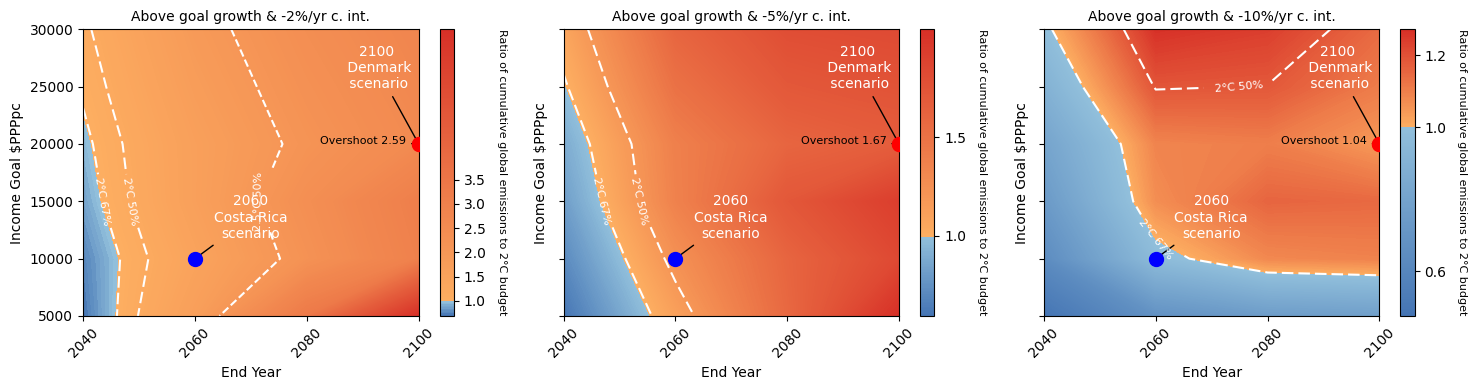

In [4]:
# last thing we should test is an above income goal growth regime with decarbonisation. to see whether decarbonisation or degrowth is more important

# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
ax7 = fig.add_subplot(gs[0, 0])  # First row, first column
ax8 = fig.add_subplot(gs[0, 1])  # First row, second column
ax9 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# Sweeper 7
end_year_values7 = [2040, 2060, 2080, 2100]
income_goal_values7 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values7 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values7 = ["constant_ratio"]
pop_growth_assumption_values7 = ["semi_log_model"]
tech_evolution_assumption_values7 = ["plausible"]
tech_hysteresis_assumption_values7 = ["on"]
steady_state_high_income_assumption_values7 = ["on_with_growth"]
population_hysteresis_assumption_values7 = ["on"]
sigmoid_parameters7 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate7 = -0.02 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper7 = ScenarioSweeper(end_year_values7,
                           income_goal_values7,
                           carbon_budget_values7,
                           gdp_assumption_values7,
                           pop_growth_assumption_values7,
                           tech_evolution_assumption_values7,
                           tech_hysteresis_assumption_values7,
                           steady_state_high_income_assumption_values7,
                           sigmoid_parameters7,
                           final_improvement_rate7,
                           population_hysteresis_assumption_values7)

# Sweeper 8
end_year_values8 = [2040, 2060, 2080, 2100]
income_goal_values8 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values8 = [1150*0.95 - 2*35]
gdp_assumption_values8 = ["constant_ratio"]
pop_growth_assumption_values8 = ["semi_log_model"]
tech_evolution_assumption_values8 = ["plausible"]
tech_hysteresis_assumption_values8 = ["on"]
steady_state_high_income_assumption_values8 = ["on_with_growth"]
population_hysteresis_assumption_values8 = ["on"]
sigmoid_parameters8 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate8 = -0.05 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper8 = ScenarioSweeper(end_year_values8,
                           income_goal_values8,
                           carbon_budget_values8,
                           gdp_assumption_values8,
                           pop_growth_assumption_values8,
                           tech_evolution_assumption_values8,
                           tech_hysteresis_assumption_values8,
                           steady_state_high_income_assumption_values8,
                           sigmoid_parameters8,
                           final_improvement_rate8,
                           population_hysteresis_assumption_values8)

# Sweeper 9
end_year_values9 = [2040, 2060, 2080, 2100]
income_goal_values9 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values9 = [1150*0.95 - 2*35]
gdp_assumption_values9 = ["constant_ratio"]
pop_growth_assumption_values9 = ["semi_log_model"]
tech_evolution_assumption_values9 = ["plausible"]
tech_hysteresis_assumption_values9 = ["on"]
steady_state_high_income_assumption_values9 = ["on_with_growth"]
population_hysteresis_assumption_values9 = ["on"]
sigmoid_parameters9 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate9 = -0.1 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper9 = ScenarioSweeper(end_year_values9,
                           income_goal_values9,
                           carbon_budget_values9,
                           gdp_assumption_values9,
                           pop_growth_assumption_values9,
                           tech_evolution_assumption_values9,
                           tech_hysteresis_assumption_values9,
                           steady_state_high_income_assumption_values9,
                           sigmoid_parameters9,
                           final_improvement_rate9,
                           population_hysteresis_assumption_values9)
                

output_sweeper7 = sweeper7.run_scenarios()
output_sweeper8 = sweeper8.run_scenarios()
output_sweeper9 = sweeper9.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input7 = output_sweeper7[0] # output now will be transformed to an input for the plots function
input8 = output_sweeper8[0] # output now will be transformed to an input for the plots function
input9 = output_sweeper9[0] # output now will be transformed to an input for the plots function

# Create a new figure with four axes
sweeper7.plot_total_emissions_trade_off(input7, ["end_year", "income_goal"], ax = ax7, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)
sweeper8.plot_total_emissions_trade_off(input8, ["end_year", "income_goal"], ax = ax8, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)   
sweeper9.plot_total_emissions_trade_off(input9, ["end_year", "income_goal"], ax = ax9, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)

ax7.set_title("Above goal growth & -2%/yr c. int.", fontsize = 10)
ax8.set_title("Above goal growth & -5%/yr c. int.", fontsize = 10)
ax9.set_title("Above goal growth & -10%/yr c. int.", fontsize = 10)

ax8.set_yticklabels([])
ax9.set_yticklabels([])


# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax7.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax8.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax9.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax7.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax8.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax9.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax7.collections[0].colorbar
cbar.set_ticks([1, 1.5, 2, 2.5, 3, 3.5])
cbar = ax8.collections[0].colorbar
cbar.set_ticks([1, 1.5,])
cbar = ax9.collections[0].colorbar
cbar.set_ticks([0.6, 1, 1.2])

plt.tight_layout()
# save high resolution as supp_figx
plt.savefig('supp_figyy.png', dpi=300, bbox_inches='tight')
plt.show()